### Initialization

In [0]:
# Install third party modules
!pip install vaderSentiment

# Download spaCy models
!python -m spacy download en_core_web_md

import json

import en_core_web_md
import pandas as pd
from IPython.display import display
import textwrap

# pandas display settings
pd.set_option('display.max_columns', 10)
pd.set_option('max_colwidth', 500)
pd.set_option('display.width', 1000)

# Initialize spaCy pipeline
SPACY = en_core_web_md.load()

RANDOM_SEED = 42  # for reproducibility

# Load Yelp reviews
reviews = []
with open("data/reviewCleaned.json", 'r', encoding='latin-1') as f:
    for line in f:
        reviews.append(json.loads(line))

column_order = ['business_id', 'text', 'stars']
YELP_REVIEWS = pd.DataFrame.from_records(reviews, columns=column_order)
YELP_REVIEWS.infer_objects()

print(f"\nFinished loading {len(YELP_REVIEWS)} to pandas DataFrame.")
print("\nSample records:")

display(YELP_REVIEWS.head())

print("\nPreliminary analysis:")
YELP_REVIEWS.describe()

# Global variables (reusable in other code cells)
# 1. SPACY: spaCy model for linguistic analysis
# 2. RANDOM_SEED: random seed for random generation
# 3. YELP_REVIEWS: pandas DataFrame containing Yelp reviews

     |████████████████████████████████| 133kB 8.4MB/s 
     |████████████████████████████████| 95.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.1.0-cp36-none-any.whl size=97126237 sha256=93381292f28b133d6698a0db222bce9790cdb459827155861c558720f33c7721
  Stored in directory: /tmp/pip-ephem-wheel-cache-mscxvsn1/wheels/c1/2c/5f/fd7f3ec336bf97b0809c86264d2831c5dfb00fc2e239d1bb01
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')

Finished loading 15222 to pandas DataFrame.

Sample records:


,business_id,text,stars
0,ZBE-H_aUlicix_9vUGQPIQ,"We had my Mother's Birthday Party here on 10/29/16. What a Great time we all had. The food, music and waiters were Great!!! Thanks Lyles!!!",5.0
1,e-YnECeZNt8ngm0tu4X9mQ,"Good Korean grill near Eaton Centre. The marinate is good. We got beef, ox liver, salmon, fish fillet, chicken, pork, pork belly. The fish fillet was bland and liver was meh. Salmon and chicken was really flavourable. Such a fun place to eat at for a date or group of friends. Even alone. No judgments here. \nThe staff is attentive, nice and considerate. Bigger groups will most likely be seated on the second floor which is way bigger.\nCaution: will smell like BBQ grill after.",4.0
2,j7HO1YeMQGYo3KibMXZ5vg,"Was recommended to try this place by few people and today was my first time here. All I can say is, I am coming back very soon.\n\nSERVICE\nWasn't sure if the guy was the owner but he was friendly and talked story while we waited for our food. Loved it!! Food came out within 10 min. \n\nFOOD\nTried hamburger steak and it was so delicious. Gravy/sauce they put on the hamburger steak was perfect! Also came with onion rings on top which I love. Chicken katsu was amazing! Chicken katsu here is c...",5.0
3,7e3PZzUpG5FYOTGt3O3ePA,"Ambience: Would not expect something this nice at Cannery Hotel but it is the nicest looking restaurant there. More for couples than group gatherings.\n\nService: The ambience & food make up for this, which unfortunately for us, the service has been terrible. We have come fairly close to restaurant closing both times (within the hour), but they do close very early for Vegas. The staff makes it VERY clear that they want to go home right from the start in hurrying orders and are more aggressiv...",3.0
4,vuHzLZ7nAeT-EiecOkS5Og,"Absolutely the WORST pool company that I have EVER had to deal with. The customer service is horrible. After leaving many messages over the course of a few weeks I was only able to contact them when I called them AGAIN. I asked to speak with the actual pool tech who initially came to my house. The RUDE lady on the phone told me that she was more than capable to answer my questions - about a pump that SHE HAS NOT SEEN, and about a conversation I had with the tech THAT SHE DID NOT HEAR. \...",1.0



Preliminary analysis:


,stars
count,15222.000000
mean,3.646367
std,1.455229
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


### 1. Writing Style


In [0]:
import textwrap

random_reviews = list(YELP_REVIEWS.sample(10, random_state=RANDOM_SEED)['text'])
for r in random_reviews:
    print(textwrap.fill(r, 150), end=f"\n{'=' * 150}\n")

Came here on Christmas Eve and it wasn't crowded at all. Prices are reasonable for brunch. And food was good portion.
One of the best! Fantastic staff, and lovely Dr. Dee care for patients passionately. Extremely clean environment with top of the line technology.
Al I can say about this place is: gorgeous! I was able to get a kid sized portion and customize my waffle to my liking!
My new Go-To car repair business! I thought I was in need of new brakes because of the squealing my wheels do, but after asking TJ to check them out
for me AND to give this new-to-me a once over for all the other items (oil, spark plugs, belts, etc) to make sure they are also in peak working order,
the only item he could find which needed attention was one of my back lights was out. I asked him to replace it and assumed my total would be $150
(diagnostic fee) PLUS the $6.51 for the bulb. I asked to make sure they accept VISA (they do!) and waited for them to call when they were ready to
pick me up. At the cou

### 2. Sentence Segmentation

Running sentence segmentation for rating 1.0 reviews...


100%|██████████| 2295/2295 [01:27<00:00, 26.08it/s]



Sample reviews with the most number of sentences:
+--------------------------------------------------------------------------------------------------------------------------+
| I am not a prolific reviewer, in fact, I rarely do so. However, the SECOND of two bad experiences really motivated me to |
| do so due to the sheer arrogance of nonetheless - the owner! Yes - the owner!!  First Negative Experience: Went on a     |
| Sunday with my wife and two children, ordered some calamari apps, so-so, oil was heavy and evidently overdue for         |
| changing. Salmon steak for the wife, grilled, potato dumpling pasta (gnocchi) for the kids with and roasted chicken with |
| rapini.  EXPLICITLY stated what was for the kids and the adults, ordered non spicy iterations.  Kids pasta came, was to  |
| be plain tomato sauce, was very spicy, kids clamored for their drinks, wife and I tasted, way too spicy for a "NON"      |
| spicy request. Now the rapini... needless to say, the kids were peeing f

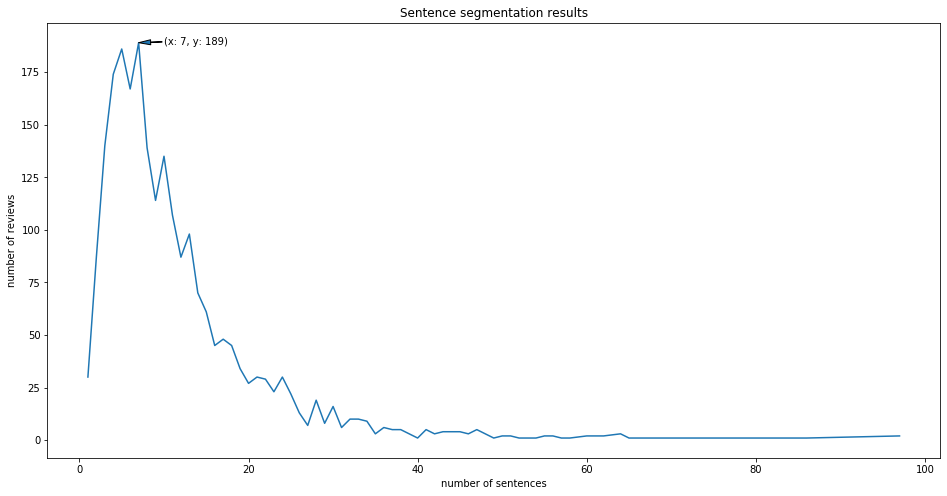

Running sentence segmentation for rating 2.0 reviews...


100%|██████████| 1365/1365 [00:51<00:00, 26.59it/s]



Sample reviews with the most number of sentences:
+--------------------------------------------------------------------------------------------------------------------------+
| My experience at The Octagon Restaurant was akin to that of a woman's experience on her cycle. It was a clusterfk of     |
| emotions...all out of whack, and all undetermined.  The evening started out good and bad. When we arrived, the parking   |
| lot was full, so the valet person told us to go away (WTF?) the valet line was backed up so bad and they were so         |
| unprofessional and rude about it; we literally decided to drive onto the separating garden island thing to get out (we   |
| keeps it classy lol). We didn't notice the cops on the street watching us from maybe a stone's throw away. They watched  |
| us ride first class on that struggle bus as we broke every traffic law in the book. They paused momentarily then LAUGHED |
| (dafuq?!). We finally parked in the next plaza down at the farmer's mark

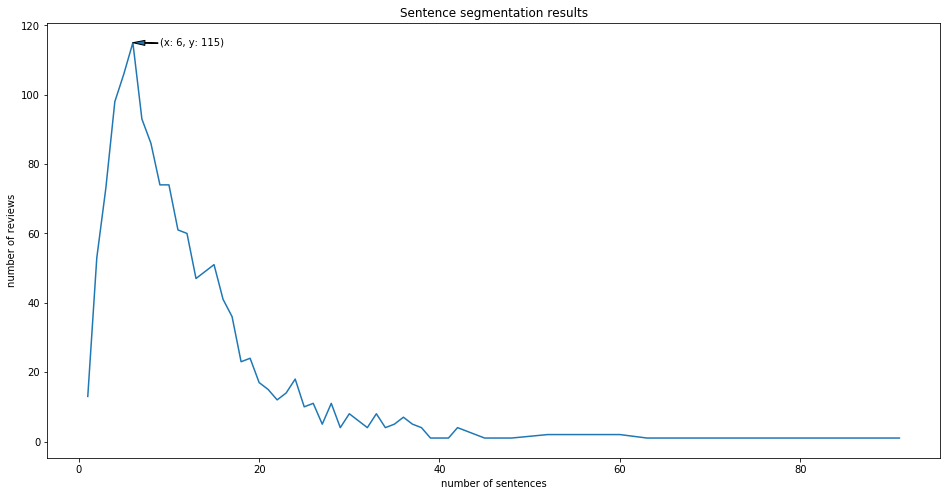

Running sentence segmentation for rating 3.0 reviews...


100%|██████████| 1895/1895 [01:04<00:00, 29.41it/s]



Sample reviews with the most number of sentences:
+--------------------------------------------------------------------------------------------------------------------------+
| Hello to all my fellow yelpers-  Where do I start... Where do I start ...  I guess I'll start at the very beginning... A |
| very good place to start!  Read reviews of Sanfrantello's and being from the great city of Chicago decided to give it a  |
| try.  The reviews were very mixed but the one good thing in common was the sausage.  My top favorite Chicago pan pizza   |
| is Gullivers on the North side of the city.  Second fav would be Gino's East.  The reasons I find these 2 places to my   |
| liking is the crust and sausage... With that being said here is my opinion of their pan pizza.  The girl who answered    |
| the phone sounded rushed as a good pizza place should be... But it is still ok to be just a little friendly.  I asked    |
| for "Scott" the owner simply in hopes of getting the best pizza they mak

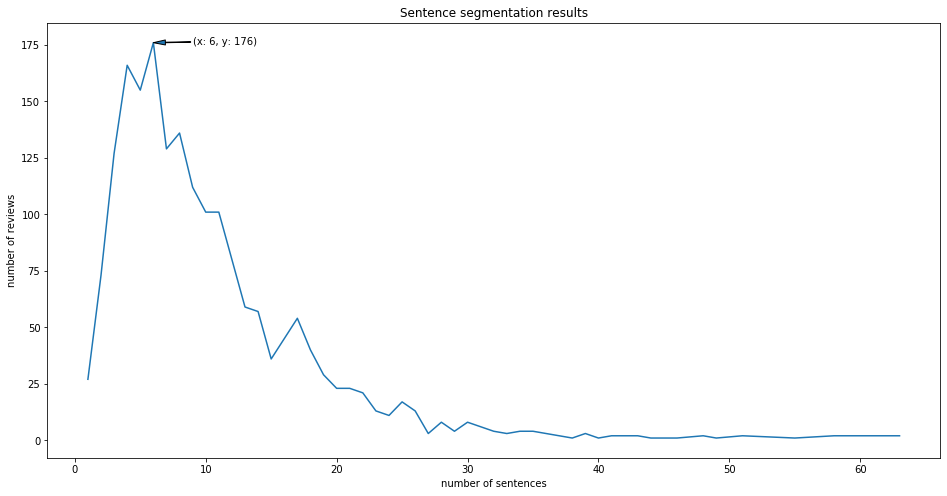

Running sentence segmentation for rating 4.0 reviews...


100%|██████████| 3540/3540 [01:49<00:00, 32.36it/s]



Sample reviews with the most number of sentences:
+--------------------------------------------------------------------------------------------------------------------------+
| My friend has been going to this location for a few months and trying (unsuccessfully) to get me to go. I thought on it. |
| I thought on it and finally I gave in last month. I figured I sometimes like to play the healthy game and I should go    |
| and get this done. I was a little curious.   When I first arrived I decided to get a detox foot bath. I was instantly    |
| asked if I would like water or some tea. I opted for the tea. Bad idea! The tea was fabulous and I bet all of you will   |
| love it. My friend does. She enjoys it. However, my hands started to shake from it and I could feel my anxiety rise. So  |
| if you are already nervous, perhaps your first time stick to the water.   The detox foot bath was interesting. My feet   |
| started to itch from the impulses in the water, but not too bad to be an

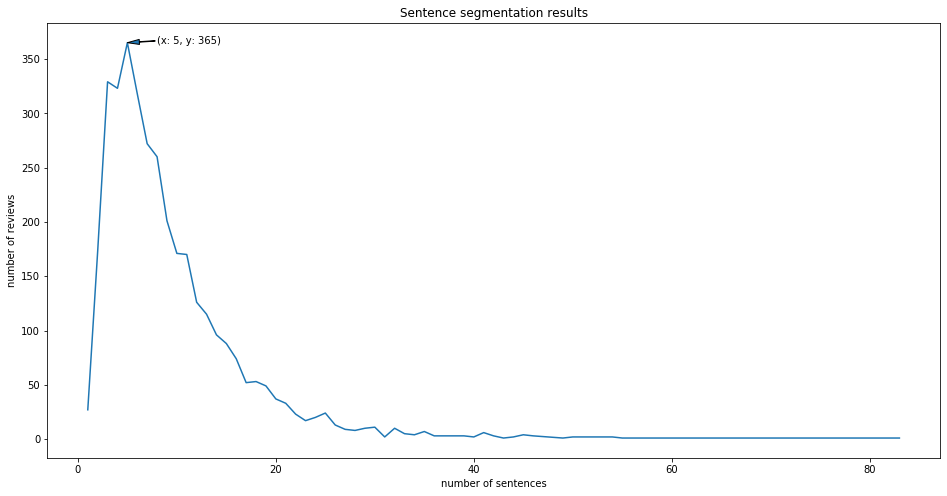

Running sentence segmentation for rating 5.0 reviews...


100%|██████████| 6127/6127 [02:41<00:00, 39.84it/s]



Sample reviews with the most number of sentences:
+--------------------------------------------------------------------------------------------------------------------------+
| I came here for the first time with my friend's family tonight.  Although parking is limited, I strongly advise you to   |
| come when it's not common lunch / dinner time.  We ordered many items: Chives and Pork Steamed Dumplings ??????, Napa    |
| Cabbage Steamed Dumplings ??????, Dill and Pork Steamed Dumplings ??????Potstickers ????, Preserved Vegetable and        |
| Shredded Pork Noodles ????????, Gumjatang ??????? and Sugar Pancake ????.  Chives and Pork Steamed Dumplings ?????? The  |
| chives and pork fillings are firm and juicy, the peel is nice and thin with a little tug when you bite into it.  Be      |
| really careful as the juice will burn you tongue.  Napa Cabbage and Pork Steamed Dumplings ?????? The Napa Cabbage has a |
| little crunch to it, this filling definitely has ginger in it.  I'm not 

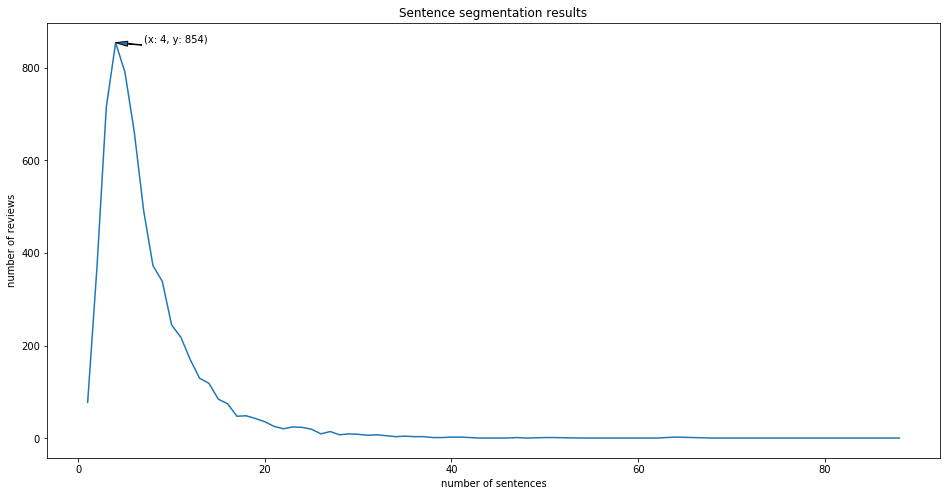

In [0]:
import textwrap

import numpy as np
import pylab as plt
from tabulate import tabulate
from tqdm import tqdm

def print_samples(df):
    df = df.sample(5, random_state=RANDOM_SEED) if len(df) > 5 else df
    items = []
    for _, row in df.iterrows():
        buffer = textwrap.fill(row['text'], 120) + '\n\n'
        buffer += "Sentences:\n"

        sentences = row['sentences']
        indent = ' ' * 5
        for i, sentence in enumerate(sentences[:5]):
            buffer += textwrap.fill(f"  {i + 1}. {sentence}", 120, subsequent_indent=indent) + "\n"
        if len(sentences) > 5:
            buffer += "  ...\n"
            if len(sentences) > 10:
                for i, sentence in enumerate(sentences[-5:]):
                    buffer += textwrap.fill(f"  {len(sentences) - (4 - i)}. {sentence}", 120, subsequent_indent=indent) + "\n"

        items.append([buffer])

    print(tabulate(items, tablefmt='grid'))

def plot_line(data, title, x_label, y_label, offset=0, figsize=(8,6)):
    unzipped = list(zip(*data))
    x_data = unzipped[0]
    y_data = unzipped[1]

    peak_index = np.argmax(y_data)
    peak_x = x_data[peak_index]
    peak_y = y_data[peak_index]

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x_data, y_data)
    plt.annotate(
        f"(x: {peak_x}, y: {peak_y})", 
        xy=(peak_x, peak_y),
        xytext=(peak_x + 3, peak_y - 1),
        arrowprops=dict(width=0.5, headwidth=5)
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

review_df = YELP_REVIEWS.copy()
review_df['sentences'] = ""
review_df['sentence_count'] = 0
for rating in sorted(list(review_df['stars'].unique())):
    partial_df = review_df[review_df['stars'] == rating]
    print(f"Running sentence segmentation for rating {rating} reviews...", flush=True)
    for index, review in tqdm(list(partial_df.iterrows())):
        sentences = [sent.text for sent in SPACY(review['text']).sents]
        partial_df.at[index, 'sentences'] = sentences
        partial_df.at[index, 'sentence_count'] = len(sentences)

    print(f"\nSample reviews with the most number of sentences:")
    print_samples(partial_df[partial_df['sentence_count'] == partial_df['sentence_count'].max()])
    print(f"\nSample reviews with the least number of sentences:")
    print_samples(partial_df[partial_df['sentence_count'] == partial_df['sentence_count'].min()])

    data = list(partial_df.groupby('sentence_count').count()['sentences'].iteritems())
    plot_line(data, "Sentence segmentation results", "number of sentences", "number of reviews", figsize=(16, 8))

### 3. Tokenization and Stemming

In [0]:
# Plotting utility
def plot_lines(df, x_col, y_cols, title, x_label, y_label, figsize=(20, 8)):
    # prepare data
    dtypes = {x_col: 'int32'}
    for y_col in y_cols:
        dtypes[y_col] = 'int32'
    data = df.astype(dtypes)

    fig = plt.subplots(figsize=figsize)
    ax = plt.gca()  # gca stands for 'get current axis'
    for y_col in y_cols:
        data.plot(kind='line', x=x_col, y=y_col, ax=ax)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def plot_bar(df, x_col, y_col, title, x_label, y_label, figsize=(20, 8), show_value=False):
    plt.figure(figsize=figsize)
    plt.title(title)
    df.set_index(x_col)[y_col].plot.bar()

    if show_value:
        values = list(df[y_col])
        ax = plt.gca()
        for i, v in enumerate(values):
            ax.text(i-0.35, v + max(values) * 0.01, v, fontsize=10)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

##### Without Stemming

100%|██████████| 15222/15222 [07:38<00:00, 33.23it/s]


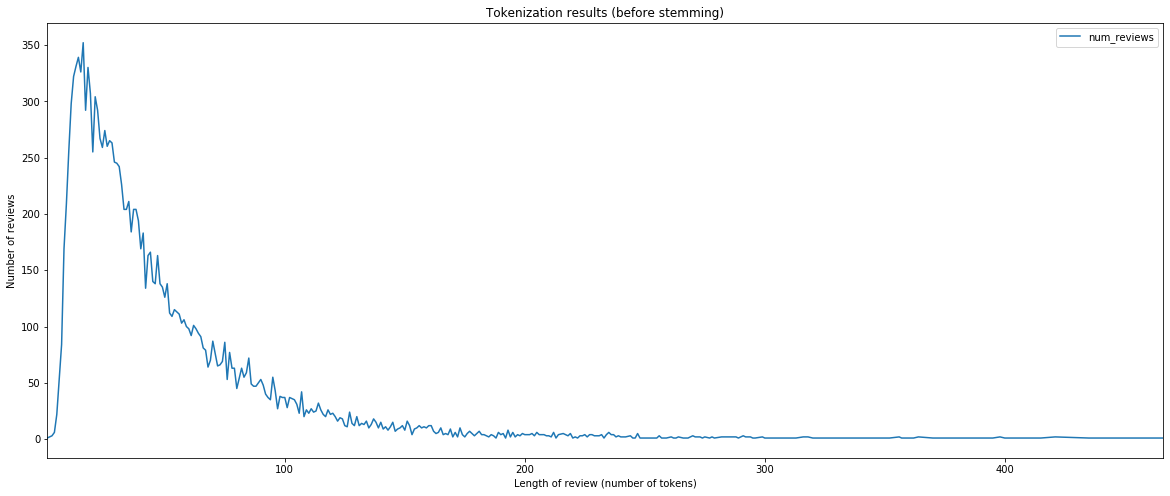


Statistics on number of tokens for all reviews:

,num_tokens
mean,48.720733
std,44.469003
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,466.000000



Statistics on number of tokens for top-100 most frequent review length (in terms of number of tokens):


,num_tokens
mean,55.730000
std,29.405165
min,6.000000
25%,30.750000
50%,55.500000
75%,80.250000
max,114.000000


*Number of reviews covered in top-100 most frequent review length: 13883 (91.2%)



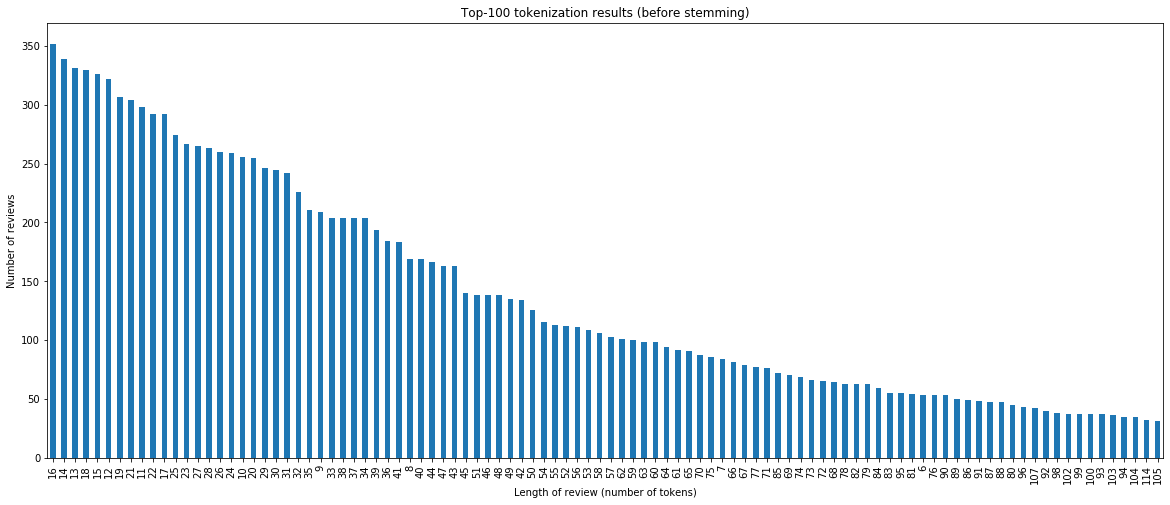

In [0]:
from collections import Counter

import matplotlib.pyplot as plt
from tqdm import tqdm

tokenizerDf = YELP_REVIEWS['text'].copy().to_frame()

# Run tokenizer
tokenizerDf['tokens'] = ''
tokenizerDf['num_tokens'] = ''
for index, row in tqdm(list(tokenizerDf.iterrows())):
    rowtext_rmws = ' '.join(row['text'].split())
    # remove stop words and punctuations
    tokens = [token.text.lower() for token in SPACY(rowtext_rmws) if not token.is_stop and not token.is_punct]
    row['tokens'] = tokens
    row['num_tokens'] = len(tokens)

# Count and plot number of reviews against number of tokens
tempDF = tokenizerDf.groupby(["num_tokens"])["text"].count().reset_index(name="num_reviews")
plot_lines(
    tempDF, 
    x_col='num_tokens', 
    y_cols=['num_reviews'], 
    title="Tokenization results (before stemming)",
    x_label="Length of review (number of tokens)", 
    y_label="Number of reviews"
)

# All results
print("\nStatistics on number of tokens for all reviews:", end='')
display(tokenizerDf['num_tokens'].astype('float64').describe().to_frame()[1:])

# Top 100 results
top_100 = tempDF.sort_values(by=["num_reviews"], ascending=False).reset_index(drop=True)[:100]
print("\nStatistics on number of tokens for top-100 most frequent review length (in terms of number of tokens):")
display(top_100['num_tokens'].astype('float64').describe().to_frame()[1:])

num_reviews = top_100["num_reviews"].sum()
percentage = round(num_reviews / len(tokenizerDf) * 100, 2)
print(f"*Number of reviews covered in top-100 most frequent review length: {num_reviews} ({percentage}%)\n")
# Plot top 100 results
plot_bar(
    top_100, 
    x_col='num_tokens', 
    y_col='num_reviews', 
    title="Top-100 tokenization results (before stemming)",
    x_label="Length of review (number of tokens)", 
    y_label="Number of reviews"
)

In [0]:
# More analysis
count50 = top_100[(top_100['num_tokens'] > 0) & (top_100['num_tokens'] < 51)]['num_reviews'].sum()
print(f"Number of reviews (num_tokens < 50 tokens): {count50} ({count50 / len(tokenizerDf) * 100:2f}%)")

count100 = top_100[(top_100['num_tokens'] >= 50) & (top_100['num_tokens'] < 101)]['num_reviews'].sum()
print(f"Number of reviews (50 tokens <= num_tokens < 100): {count100} ({count100 / len(tokenizerDf) * 100:2f}%)")

count150 = top_100[(top_100['num_tokens'] >= 100) & (top_100['num_tokens'] < 151)]['num_reviews'].sum()
print(f"NNumber of reviews (100 tokens <= num_tokens < 151): {count150} ({count150 / len(tokenizerDf) * 100:2f}%)")

print("\nAbnormal tokenization result(s):")
abnormal_reviews = tokenizerDf[tokenizerDf['num_tokens'] == 1]
for _, review in abnormal_reviews.iterrows():
    print(textwrap.fill(review['tokens'][0]))

Number of reviews (num_tokens < 50 tokens): 10126 (66.522139%)
Number of reviews (50 tokens <= num_tokens < 100): 3670 (24.109841%)
NNumber of reviews (100 tokens <= num_tokens < 151): 250 (1.642360%)

Abnormal tokenization result(s):
fusion??????????xxx???????????????????????????????????????????????????
??????????????????????????????????????????????????????????????????????
??????????????????????????????????????????????????????????????????????
?????????????????????????????????staff??????????????????????????-_-


##### With Stemming

100%|██████████| 15222/15222 [00:11<00:00, 1362.43it/s]


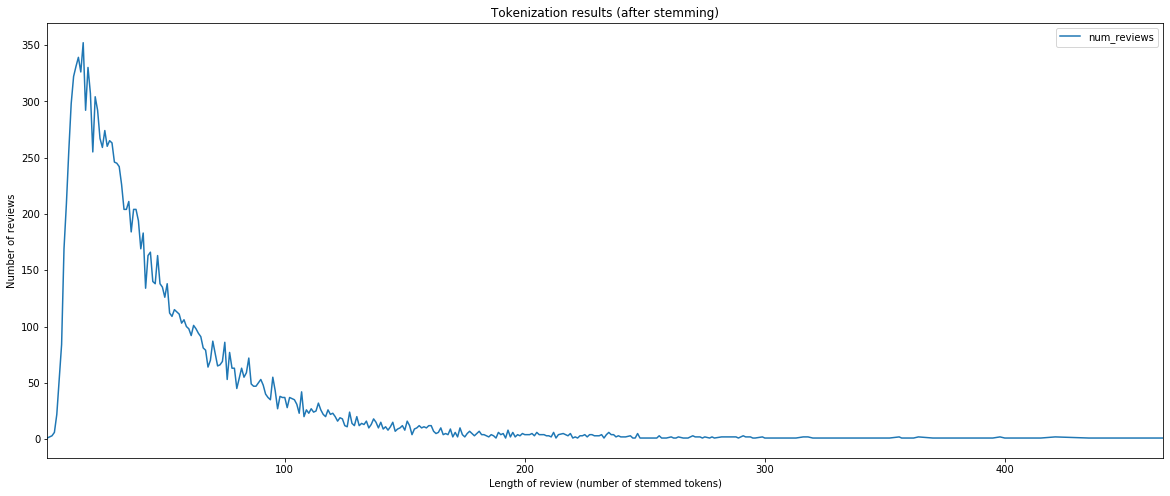


Statistics on number of stemmed tokens for all reviews:

,num_stem_tokens
mean,48.720733
std,44.469003
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,466.000000



Statistics on number of stemmed tokens for top-100 most frequent review length (in terms of number of tokens):


,num_stem_tokens
mean,55.730000
std,29.405165
min,6.000000
25%,30.750000
50%,55.500000
75%,80.250000
max,114.000000


*Number of reviews covered in top-100 most frequent review length: 13883 (91.2%)



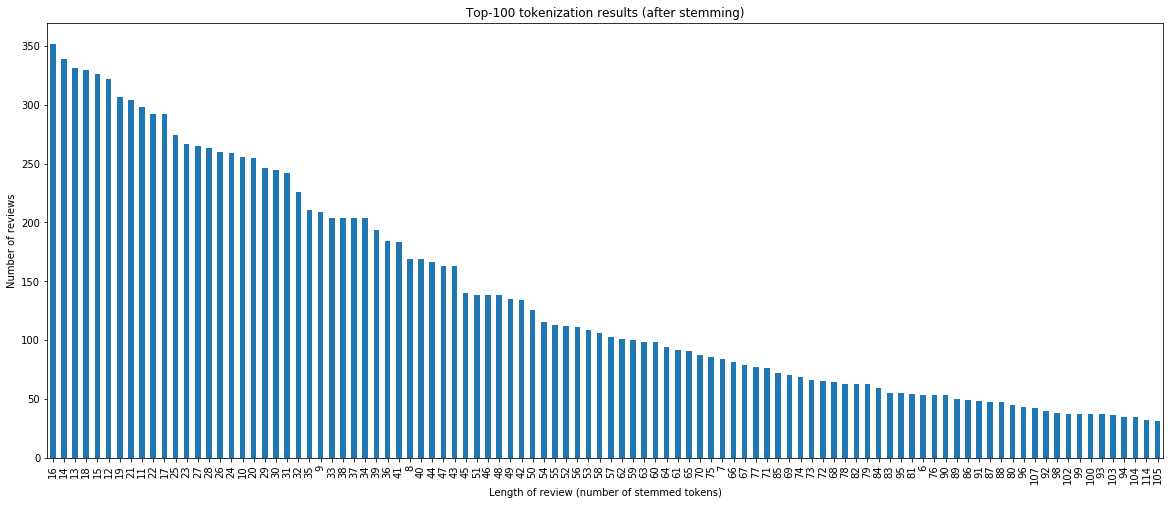

In [0]:
import nltk

from nltk.stem.snowball import SnowballStemmer

# Run stemmer
stemmer = SnowballStemmer(language='english')
tokenizerDf['stem_tokens'] = ''
tokenizerDf['num_stem_tokens'] = ''
for index, row in tqdm(list(tokenizerDf.iterrows())):
    tokens = [stemmer.stem(word) for word in row['tokens']]
    row['stem_tokens'] = tokens
    row['num_stem_tokens'] = len(tokens)

# Count and plot number of reviews against number of stemmed tokens
tempDF = tokenizerDf.groupby(["num_stem_tokens"])["text"].count().reset_index(name="num_reviews")
plot_lines(
    tempDF, 
    x_col='num_stem_tokens', 
    y_cols=['num_reviews'], 
    title="Tokenization results (after stemming)",
    x_label="Length of review (number of stemmed tokens)", 
    y_label="Number of reviews"
)

# All results
print("\nStatistics on number of stemmed tokens for all reviews:", end='')
display(tokenizerDf['num_stem_tokens'].astype('float64').describe().to_frame()[1:])

# Top 100 results
top_100 = tempDF.sort_values(by=["num_reviews"], ascending=False).reset_index(drop=True)[:100]
print("\nStatistics on number of stemmed tokens for top-100 most frequent review length (in terms of number of tokens):")
display(top_100['num_stem_tokens'].astype('float64').describe().to_frame()[1:])
num_reviews = top_100["num_reviews"].sum()
percentage = round(num_reviews / len(tokenizerDf) * 100, 2)
print(f"*Number of reviews covered in top-100 most frequent review length: {num_reviews} ({percentage}%)\n")

# Plot top 100 results
plot_bar(
    top_100, 
    x_col='num_stem_tokens', 
    y_col='num_reviews', 
    title="Top-100 tokenization results (after stemming)",
    x_label="Length of review (number of stemmed tokens)", 
    y_label="Number of reviews"
)

##### Comparision between stemming and not stemming

100%|██████████| 15222/15222 [00:00<00:00, 16924.56it/s]



Top-20 most frequent tokens (before stemming):


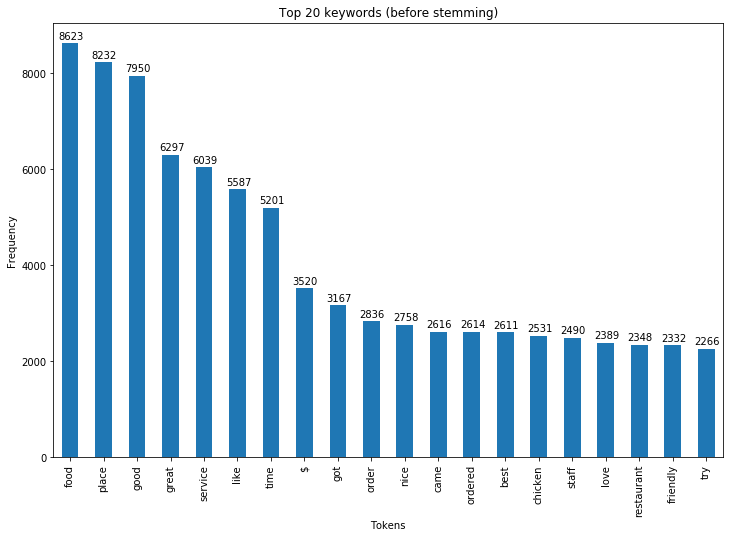


Top-20 most frequent tokens (after stemming):


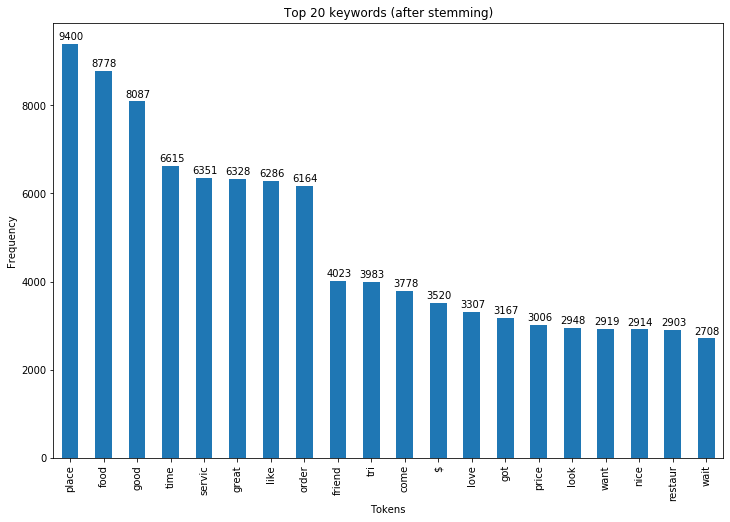

In [0]:
# List top-20 most frequent tokens
from collections import Counter

import pandas as pd
from tqdm import tqdm

# count number of tokens before and after stemming
token_counter = Counter()
stem_token_counter = Counter()
for _, row in tqdm(list(tokenizerDf.iterrows())):
    token_counter.update(row['tokens'])
    stem_token_counter.update(row['stem_tokens'])

# result before stemming
print(f"\nTop-20 most frequent tokens (before stemming):")
top_20 = pd.DataFrame.from_records(token_counter.most_common(20), columns=["tokens", "frequency"])
top_20.index += 1
# display(top_20)
plot_bar(
    top_20, 
    x_col='tokens', 
    y_col='frequency', 
    title="Top 20 keywords (before stemming)",
    x_label="Tokens", 
    y_label="Frequency",
    figsize=(12, 8),
    show_value=True
)

# result after stemming
print(f"\nTop-20 most frequent tokens (after stemming):")
top_20 = pd.DataFrame.from_records(stem_token_counter.most_common(20), columns=["tokens", "frequency"])
top_20.index += 1
# display(top_20)
plot_bar(
    top_20, 
    x_col='tokens', 
    y_col='frequency', 
    title="Top 20 keywords (after stemming)",
    x_label="Tokens", 
    y_label="Frequency",
    figsize=(12, 8),
    show_value=True
)

100%|██████████| 15222/15222 [00:01<00:00, 12972.64it/s]



Before removing duplicated tokens:


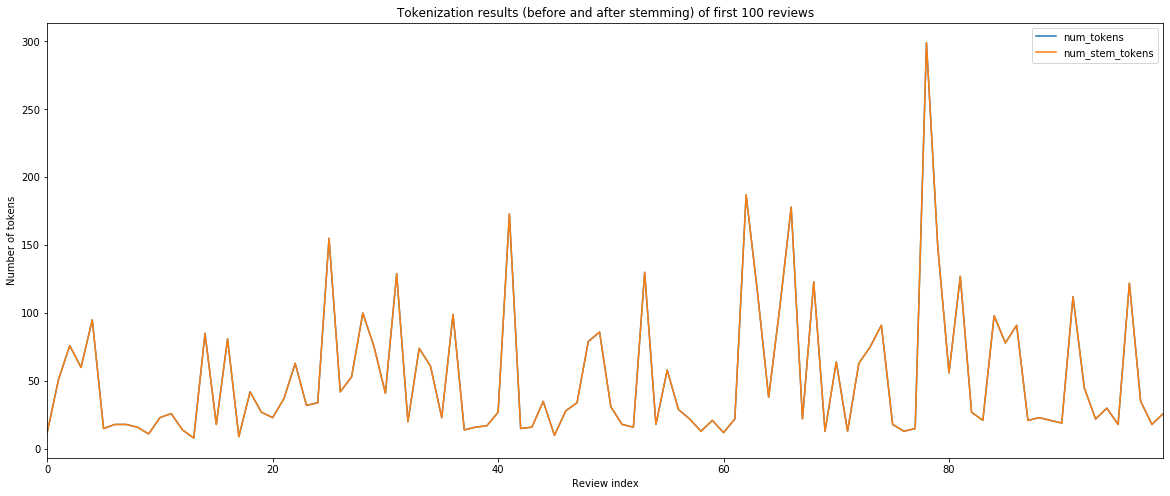


After removing duplicated tokens:


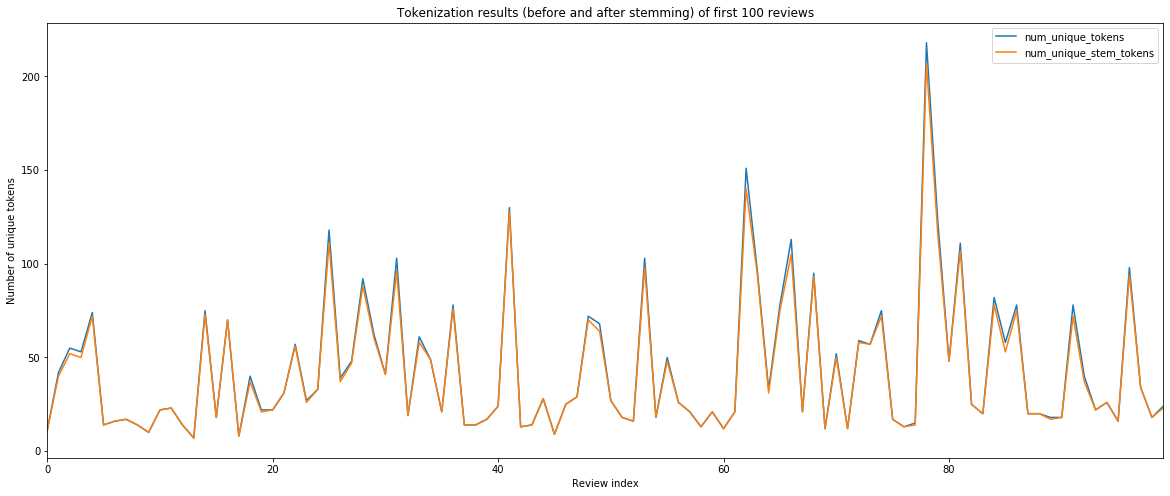


Number of reviews with decreases in number of unique tokens after stemming: 7715 (0.51%)

Review(s) with greatest reduce in number of unique tokens after stemming is applied:
*****BED BUG INFESTATION*******  Forewarning! DO NOT RENT FROM REBEL PLACE!!! I was here for not even 2 weeks and within
the first week my boyfriend and I found these huge bites on our back that were itchy. It turns out that rebel place is
KNOWN TO HAVE A BED BUG PROBLEM.   First thing we did was call Brandon in the front office that night, and he basically
said that because it was a Thursday at 4PM, there was nothing he could do about it and advised that we sleep there.
SLEEP IN A PLACE WITH BED BUGS. Also, because we didn't notify Rebel Place that we had an infestation within 48 hours of
"moving in"(even though I had not been living there for a few weeks after "moving in"), it was not their responsibility.
They said that WE have to pay for an inspector to come out before we could get the place sprayed. HOWEVER,

In [0]:
# Remove duplicate tokens
import textwrap

tokenizerDf['num_unique_tokens'] = ''
tokenizerDf['num_unique_stem_tokens'] = ''
tokenizerDf['unique_diff'] = ''

for index, row in tqdm(list(tokenizerDf.iterrows())):
    row['num_unique_tokens'] = len(set(row['tokens']))
    row['num_unique_stem_tokens'] = len(set(row['stem_tokens']))
    row['unique_diff'] = row['num_unique_tokens'] - row['num_unique_stem_tokens']

print("\nBefore removing duplicated tokens:")
plot_lines(
    tokenizerDf[:100].reset_index(), 
    x_col='index', 
    y_cols=['num_tokens', 'num_stem_tokens'], 
    title="Tokenization results (before and after stemming) of first 100 reviews",
    x_label="Review index", 
    y_label="Number of tokens"
)

print("\nAfter removing duplicated tokens:")
plot_lines(
    tokenizerDf[:100].reset_index(), 
    x_col='index', 
    y_cols=['num_unique_tokens', 'num_unique_stem_tokens'], 
    title="Tokenization results (before and after stemming) of first 100 reviews",
    x_label="Review index", 
    y_label="Number of unique tokens"
)

# Count reviews with decrease in number of unique tokens after stemming
diff_count = len(tokenizerDf[tokenizerDf['unique_diff'] > 0])
print(f"\nNumber of reviews with decreases in number of unique tokens after stemming: {diff_count} ({diff_count / len(tokenizerDf):.2f}%)")

# Get reviews with greatest reduce in number of unique tokens after stemming is applied
print("\nReview(s) with greatest reduce in number of unique tokens after stemming is applied:")
max_diff = tokenizerDf['unique_diff'].max()
for _, row in tokenizerDf[tokenizerDf['unique_diff'] == max_diff].iterrows():
    print('=' * 120)
    print(f"{textwrap.fill(row['text'], 120)}")

    tokens = set(row['tokens'])
    stem_tokens = set(row['stem_tokens'])
    tokens_str = textwrap.fill(f"[{', '.join(tokens)}]", 100)
    stem_tokens_str = textwrap.fill(f"[{', '.join(stem_tokens)}]", 100)
    print(f"\nunique tokens before stemming:\n{tokens_str}")
    print(f"\nunique tokens after stemming:\n{stem_tokens_str}")

    print(f"\nNumber of unique tokens before stemming: {len(tokens)}")
    print(f"Number of unique tokens after stemming: {len(stem_tokens)}")
    print(f"Difference: {len(tokens) - len(stem_tokens)} ({(len(tokens) - len(stem_tokens)) / len(tokens) * 100:.2f}%)")

### 4. POS Tagging

In [0]:
import textwrap

def pos_tags(sentence):
    return [(token.text, token.tag_) for token in SPACY(sentence)]

short_reviews = YELP_REVIEWS[YELP_REVIEWS['text'].str.len() < 150]
for r in list(short_reviews.sample(5, random_state=RANDOM_SEED)['text']):
    pos_result = " ".join([f"{token}[{tag}]" for token, tag in pos_tags(r)])
    print(textwrap.fill(pos_result, 150), end=f"\n{'=' * 150}\n")

We[PRP] have[VBP] been[VBN] going[VBG] to[IN] the[DT] cafe[NN] since[IN] it[PRP] opened[VBD] ,[,]  [_SP] The[DT] food[NN] is[VBZ] great[JJ] ,[,]
the[DT] waitresses[NNS] are[VBP] very[RB] and[CC] know[VBP] the[DT] menu[NN] .[.]  [_SP] I[PRP] love[VBP] the[DT] homemade[JJ] soups[NNS] ![.] ![.]
Excellent[JJ]  [_SP] customer[NN] service[NN]  [_SP] would[MD] defiantly[RB] recommend[VB]  [_SP] to[IN] anyone[NN] wanting[VBG] great[JJ] car[NN]
tint[NN]
great[JJ] experience[NN] worth[JJ] Ken[NNP] and[CC] johnny[NNP] ...[:] beautiful[JJ] salon[NN] ....[NFP] relaxing[VBG] atmosphere[NN] ....[NFP]
loved[VBD] it[PRP] ![.]
Loved[VBD] this[DT] place[NN] today[NN] during[IN] lunch[NN] ![.] Not[RB] too[RB] busy[JJ] and[CC] great[JJ] food[NN] .[.] Avocado[NNP] delight[NN]
was[VBD] a[DT] great[JJ] appetizer[NN] for[IN] 2[CD] and[CC] no[DT] carb[NN] .[.]
WOW[UH] ...[:] Perfect[JJ] simple[JJ] &[CC] delicious[JJ] I[PRP] went[VBD] for[IN] the[DT] Big[JJ] bowl[NN] salmon[NN] &[CC] tuna[NN] &[CC] all[PDT]
the[

### 5. Most Frequent Adjectives for each Rating

##### Sort by most used adjectives

In [0]:
import string

import pandas as pd
from tqdm import tqdm

def normalize_word(token):
    return token.lower().translate(str.maketrans('', '', string.punctuation))

adj_records = []
for _, review, rating in tqdm(YELP_REVIEWS.loc[:,['text', 'stars']].to_records()):
    rating = round(rating)
    adj_records.extend([{'rating': rating, 'adjective': normalize_word(token.text)} for token in SPACY(review) if token.pos_ == 'ADJ'])

# Add count of adjective group by rating
adj_df = pd.DataFrame.from_records(adj_records).groupby(['rating', 'adjective'])['adjective'].count().to_frame('count_by_rating').reset_index()

# sort by most used adjectives for each rating
for rating, group in list(adj_df.groupby('rating'))[::-1]:
    print(f"Top 10 most used adjectives for rating {rating} reviews:")
    rows = group.sort_values('count_by_rating', ascending=False)[['adjective', 'count_by_rating']].head(10)
    r = rows.reset_index(drop=True)
    r.index += 1
    display(r)

    print("=" * 60)

100%|██████████| 15222/15222 [07:38<00:00, 33.21it/s]


Top 10 most used adjectives for rating 5.0 reviews:


,adjective,count_by_rating
1,great,3250
2,good,2105
3,best,1503
4,friendly,1266
5,amazing,1246
6,delicious,978
7,nice,942
8,other,801
9,fresh,688
10,awesome,625


Top 10 most used adjectives for rating 4.0 reviews:


,adjective,count_by_rating
1,good,2734
2,great,1854
3,nice,878
4,other,781
5,little,693
6,delicious,655
7,friendly,616
8,more,533
9,fresh,495
10,best,494


Top 10 most used adjectives for rating 3.0 reviews:


,adjective,count_by_rating
1,good,1549
2,other,569
3,great,540
4,nice,478
5,little,388
6,more,348
7,better,297
8,small,293
9,bad,273
10,decent,262


Top 10 most used adjectives for rating 2.0 reviews:


,adjective,count_by_rating
1,good,789
2,other,396
3,great,299
4,better,258
5,more,258
6,bad,246
7,nice,225
8,first,206
9,little,198
10,small,188


Top 10 most used adjectives for rating 1.0 reviews:


,adjective,count_by_rating
1,good,663
2,other,542
3,bad,460
4,worst,377
5,more,354
6,new,325
7,first,324
8,last,299
9,horrible,297
10,rude,290


##### Sort by most pointwise relative entropy

In [0]:
# Most indicative adjectives by pointwise relative entropy
import math

def compute_pre(row, rating_word_count, all_word_count):
    rating = row['rating']
    word = row['adjective']
    count_by_rating = row['count_by_rating']
    count_by_all = row['count_by_all']

    posterior = count_by_rating / rating_word_count
    prior = count_by_all / all_word_count
    return posterior * math.log(posterior / prior)

adj_df['count_by_all'] = adj_df.groupby('adjective')['count_by_rating'].transform('sum')
all_word_count = adj_df['count_by_rating'].sum()
for rating, group in list(adj_df.groupby('rating'))[::-1]:
    rating_word_count = group['count_by_rating'].sum()
    print(f"Top 10 most indicative adjectives for rating {rating} reviews:")
    group['indicative_score'] = group.apply(lambda row: compute_pre(row, rating_word_count, all_word_count), axis=1)
    rows = group.sort_values('indicative_score', ascending=False)[['adjective', 'indicative_score']].head(10)
    r = rows.reset_index(drop=True)
    r.index += 1
    display(r)

    print("=" * 60)

Top 10 most indicative adjectives for rating 5.0 reviews:


,adjective,indicative_score
1,great,0.026147
2,amazing,0.017333
3,best,0.017001
4,friendly,0.011096
5,delicious,0.007821
6,awesome,0.007589
7,excellent,0.004648
8,helpful,0.004474
9,wonderful,0.004416
10,professional,0.004296


Top 10 most indicative adjectives for rating 4.0 reviews:


,adjective,indicative_score
1,good,0.020313
2,great,0.006691
3,tasty,0.005185
4,delicious,0.004948
5,nice,0.004708
6,little,0.004518
7,fresh,0.002734
8,small,0.002521
9,spicy,0.002255
10,huge,0.002137


Top 10 most indicative adjectives for rating 3.0 reviews:


,adjective,indicative_score
1,good,0.019671
2,decent,0.010721
3,ok,0.007949
4,average,0.006242
5,other,0.005480
6,okay,0.005474
7,small,0.005137
8,little,0.004107
9,better,0.004053
10,nice,0.003504


Top 10 most indicative adjectives for rating 2.0 reviews:


,adjective,indicative_score
1,better,0.007787
2,bland,0.007273
3,bad,0.006877
4,same,0.005445
5,dry,0.005277
6,disappointed,0.005065
7,disappointing,0.004641
8,ok,0.004615
9,mediocre,0.004564
10,other,0.004420


Top 10 most indicative adjectives for rating 1.0 reviews:


,adjective,indicative_score
1,worst,0.028473
2,horrible,0.020564
3,rude,0.019976
4,terrible,0.016524
5,bad,0.016295
6,poor,0.008635
7,last,0.008185
8,awful,0.007713
9,worse,0.007087
10,disgusting,0.006565


##### Sort by most tf-idf score

In [0]:
# Most indicative adjectives by tf-idf score
from sklearn.feature_extraction.text import TfidfVectorizer

# group reviews with same the rating into one document
documents = [" ".join(group['text']) for _, group in list(YELP_REVIEWS.groupby('stars'))[::-1]]

# train vectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english')
vectors = vectorizer.fit_transform(documents)
vocabs = vectorizer.get_feature_names()

def get_tf_idf_score(row):
    doc_id = int(row['rating']) - 1
    word = row['adjective']
    token_id = vocabs.index(word) if word in vocabs else -1

    return vectors.getrow(doc_id).getcol(token_id).todense().item() if token_id != -1 else 0

for rating, group in list(adj_df.groupby('rating'))[::-1]:
    print(f"Top 10 most indicative adjectives for rating {rating} reviews:")
    group['tf-idf'] = group.apply(lambda row: get_tf_idf_score(row), axis=1)
    rows = group.sort_values('tf-idf', ascending=False)[['adjective', 'tf-idf']].head(10)
    r = rows.reset_index(drop=True)
    r.index += 1
    display(r)

    print("=" * 60)

Top 10 most indicative adjectives for rating 5.0 reviews:


,adjective,tf-idf
1,place,0.234220
2,just,0.207130
3,like,0.187000
4,good,0.126987
5,order,0.123412
6,ordered,0.096698
7,bad,0.087856
8,worst,0.075063
9,make,0.071113
10,left,0.070736


Top 10 most indicative adjectives for rating 4.0 reviews:


,adjective,tf-idf
1,good,0.238547
2,just,0.229065
3,like,0.206247
4,better,0.094530
5,great,0.091567
6,bad,0.074083
7,pretty,0.068749
8,nice,0.067267
9,little,0.061044
10,ok,0.058970


Top 10 most indicative adjectives for rating 3.0 reviews:


,adjective,tf-idf
1,good,0.353240
2,like,0.228554
3,just,0.196319
4,service,0.176620
5,great,0.122448
6,nice,0.109240
7,pretty,0.108569
8,little,0.096481
9,restaurant,0.096481
10,better,0.084393


Top 10 most indicative adjectives for rating 2.0 reviews:


,adjective,tf-idf
1,good,0.370977
2,great,0.252737
3,like,0.187302
4,just,0.145784
5,nice,0.118777
6,little,0.100638
7,pretty,0.096473
8,got,0.092442
9,delicious,0.089217
10,friendly,0.083171


Top 10 most indicative adjectives for rating 1.0 reviews:


,adjective,tf-idf
1,great,0.342905
2,good,0.222935
3,best,0.163831
4,like,0.154188
5,just,0.145789
6,friendly,0.131998
7,amazing,0.129821
8,delicious,0.103587
9,nice,0.098714
10,fresh,0.072791


##### Sort by most valence score

In [0]:
# Most indicative adjectives by absolute valence score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def get_valence_score(row):
    return analyser.polarity_scores(row['adjective'])['compound']

for rating, group in list(adj_df.groupby('rating'))[::-1]:
    print(f"Top 10 most indicative adjectives for rating {rating} reviews")
    group['valence'] = group.apply(lambda row: get_valence_score(row), axis=1)
    rows = group.sort_values('valence', ascending=False)[['adjective', 'valence']]
    
    print("By positive valence:")
    
    r = rows.head(10).reset_index(drop=True)
    r.index += 1
    display(r)
    
    print("By negative valence:")
    r = rows.tail(10).iloc[::-1].reset_index(drop=True)
    r.index += 1
    display(r)

    print("=" * 60)

Top 10 most indicative adjectives for rating 5.0 reviews
By positive valence:


,adjective,valence
1,best,0.6369
2,happiest,0.6369
3,greatest,0.6369
4,glorious,0.6369
5,elated,0.6369
6,awesome,0.6249
7,great,0.6249
8,superb,0.6249
9,outstanding,0.6124
10,heavenly,0.6124


By negative valence:


,adjective,valence
1,horrific,-0.6597
2,evil,-0.6597
3,dead,-0.6486
4,devastating,-0.6486
5,heartbroken,-0.6486
6,excruciating,-0.6486
7,abusive,-0.6369
8,abhorrent,-0.6249
9,brutal,-0.6249
10,worst,-0.6249


Top 10 most indicative adjectives for rating 4.0 reviews
By positive valence:


,adjective,valence
1,best,0.6369
2,glorious,0.6369
3,greatest,0.6369
4,elated,0.6369
5,awesome,0.6249
6,superb,0.6249
7,great,0.6249
8,gorgeous,0.6124
9,heavenly,0.6124
10,outstanding,0.6124


By negative valence:


,adjective,valence
1,dead,-0.6486
2,abusive,-0.6369
3,pissed,-0.6369
4,worst,-0.6249
5,racist,-0.6124
6,disastrous,-0.5994
7,irate,-0.5994
8,die,-0.5994
9,obscene,-0.5859
10,horrendous,-0.5859


Top 10 most indicative adjectives for rating 3.0 reviews
By positive valence:


,adjective,valence
1,best,0.6369
2,happiest,0.6369
3,greatest,0.6369
4,superb,0.6249
5,awesome,0.6249
6,great,0.6249
7,outstanding,0.6124
8,heavenly,0.6124
9,gorgeous,0.6124
10,blessed,0.5994


By negative valence:


,adjective,valence
1,dead,-0.6486
2,heartbroken,-0.6486
3,pissed,-0.6369
4,brutal,-0.6249
5,worst,-0.6249
6,racist,-0.6124
7,dismal,-0.6124
8,horrendous,-0.5859
9,dishonest,-0.5719
10,negative,-0.5719


Top 10 most indicative adjectives for rating 2.0 reviews
By positive valence:


,adjective,valence
1,greatest,0.6369
2,best,0.6369
3,glorious,0.6369
4,superb,0.6249
5,great,0.6249
6,awesome,0.6249
7,gorgeous,0.6124
8,outstanding,0.6124
9,super,0.5994
10,beautiful,0.5994


By negative valence:


,adjective,valence
1,horrific,-0.6597
2,excruciating,-0.6486
3,dead,-0.6486
4,pissed,-0.6369
5,abusive,-0.6369
6,brutal,-0.6249
7,worst,-0.6249
8,racist,-0.6124
9,saddest,-0.6124
10,dismal,-0.6124


Top 10 most indicative adjectives for rating 1.0 reviews
By positive valence:


,adjective,valence
1,best,0.6369
2,elated,0.6369
3,greatest,0.6369
4,great,0.6249
5,awesome,0.6249
6,superb,0.6249
7,gorgeous,0.6124
8,outstanding,0.6124
9,gleeful,0.5994
10,blessed,0.5994


By negative valence:


,adjective,valence
1,horrific,-0.6597
2,evil,-0.6597
3,shittiest,-0.6597
4,excruciating,-0.6486
5,heartbroken,-0.6486
6,dead,-0.6486
7,pissed,-0.6369
8,abusive,-0.6369
9,hellish,-0.6369
10,abhorrent,-0.6249
